<a href="https://colab.research.google.com/github/PALLADIUM26/ML/blob/main/ML11_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11.	Perform k- means clustering algorithm for customer segmentation from given features. Utilize Euclidean distance and Manhattan distance for this problem. Also, plot in terms of 2D and 3D clusters this problem.
Dataset: Customer segmentation dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist

In [ ]:
# Load the dataset (update name if different)
df = pd.read_csv("/content/Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df = df.dropna()
X = df.select_dtypes(include=[np.number])
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_euc = KMeans(n_clusters=3, random_state=42)
labels_euc = kmeans_euc.fit_predict(X_scaled)
df['Cluster_Euclidean'] = labels_euc

<ipython-input-3-30924dbfbfbd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_Euclidean'] = labels_euc


In [ ]:
def kmeans_manhattan(X, k, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    for _ in range(max_iters):
        labels = np.argmin(cdist(X, centroids, metric='cityblock'), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

In [ ]:
labels_man, _ = kmeans_manhattan(X_scaled, k=3)
df['Cluster_Manhattan'] = labels_man

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

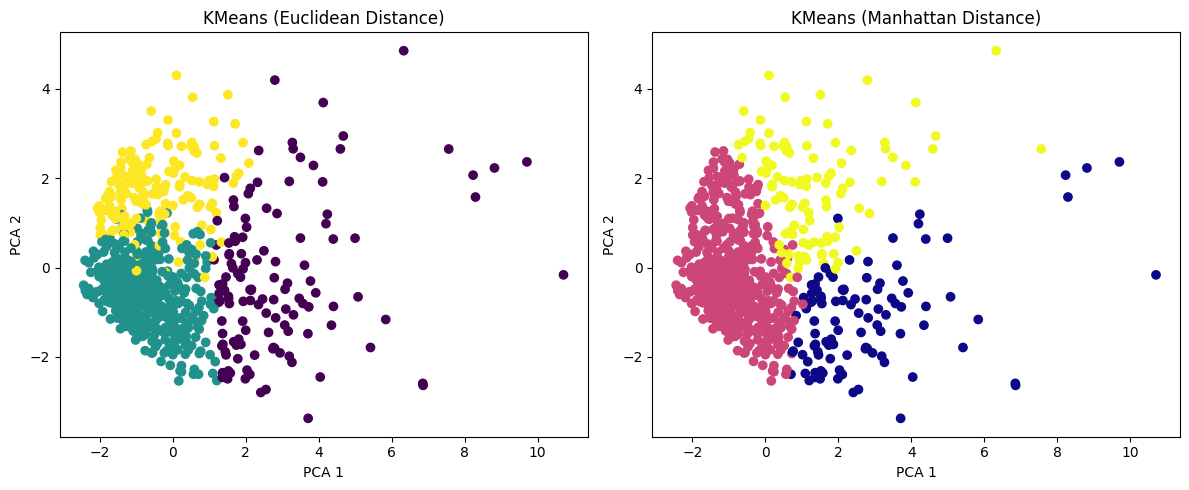

In [ ]:
plt.figure(figsize=(12,5))

# Euclidean Clustering
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster_Euclidean'], cmap='viridis')
plt.title('KMeans (Euclidean Distance)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# Manhattan Clustering
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster_Manhattan'], cmap='plasma')
plt.title('KMeans (Manhattan Distance)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

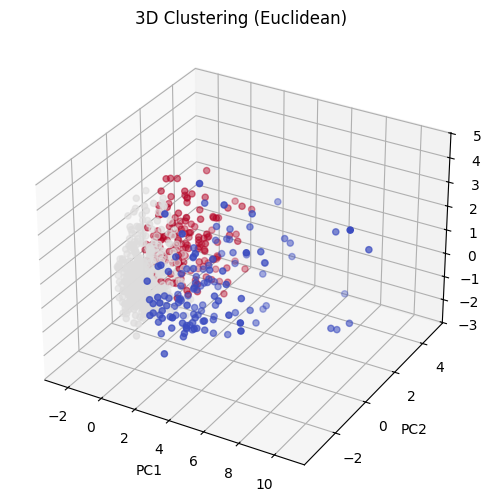

In [ ]:
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=df['Cluster_Euclidean'], cmap='coolwarm')
ax.set_title('3D Clustering (Euclidean)')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()